In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#Варіант 4

In [2]:
#Загрузити датасет, що містить інформацію про відвідуваність музеїв в різні роки.
#Вивести перші 5 рядків датасету.
data = pd.read_csv('D:/Учеба/Машинне Навчання/Lab7/museum_visitors.csv',  encoding = "ISO-8859-1")
data.head(5)

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [3]:
#Провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків)
data.shape

(59, 5)

In [4]:
data.dtypes

Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object

In [5]:
print("Пропусків у Date: ", sum(data['Date'].isnull()))
print("Пропусків у Avila Adobe: ", sum(data['Avila Adobe'].isnull()))
print("Пропусків у Firehouse Museum: ", sum(data['Firehouse Museum'].isnull()))
print("Пропусків у Chinese American Museum: ", sum(data['Chinese American Museum'].isnull()))
print("Пропусків у America Tropical Interpretive Center: ", sum(data['America Tropical Interpretive Center'].isnull()))

Пропусків у Date:  0
Пропусків у Avila Adobe:  0
Пропусків у Firehouse Museum:  0
Пропусків у Chinese American Museum:  0
Пропусків у America Tropical Interpretive Center:  0


In [6]:
#Перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів)
print(sum(data['Date'].duplicated()))
print(sum(data['Avila Adobe'].duplicated()))
print(sum(data['Firehouse Museum'].duplicated()))
print(sum(data['Chinese American Museum'].duplicated()))
print(sum(data['America Tropical Interpretive Center'].duplicated()))

0
0
0
1
0


In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data.head(5)

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [8]:
data.drop_duplicates(keep="first", inplace=True)
data.shape

(59, 5)

In [9]:
#Про які роки містить інформацію датасет
print(data['Date'])
#2014 - 2018

0    2014-01-01
1    2014-02-01
2    2014-03-01
3    2014-04-01
4    2014-05-01
5    2014-06-01
6    2014-07-01
7    2014-08-01
8    2014-09-01
9    2014-10-01
10   2014-11-01
11   2014-12-01
12   2015-01-01
13   2015-02-01
14   2015-03-01
15   2015-04-01
16   2015-05-01
17   2015-06-01
18   2015-07-01
19   2015-08-01
20   2015-09-01
21   2015-10-01
22   2015-11-01
23   2015-12-01
24   2016-01-01
25   2016-02-01
26   2016-03-01
27   2016-04-01
28   2016-05-01
29   2016-06-01
30   2016-07-01
31   2016-08-01
32   2016-09-01
33   2016-10-01
34   2016-11-01
35   2016-12-01
36   2017-01-01
37   2017-02-01
38   2017-03-01
39   2017-04-01
40   2017-05-01
41   2017-06-01
42   2017-07-01
43   2017-08-01
44   2017-09-01
45   2017-10-01
46   2017-11-01
47   2017-12-01
48   2018-01-01
49   2018-02-01
50   2018-03-01
51   2018-04-01
52   2018-05-01
53   2018-06-01
54   2018-07-01
55   2018-08-01
56   2018-09-01
57   2018-10-01
58   2018-11-01
Name: Date, dtype: datetime64[ns]


In [10]:
#Змінити назви столбців. Замінити великі букви на маленьки, пробіли на підкреслення 
#(date, avila_adobe, firehouse_museum, chinese_american_museum, america_tropical_interpretive_center)
data = data.rename(columns={'Date':'date', 'Avila Adobe':'avila_adobe', 'Firehouse Museum':'firehouse_museum', 'Chinese American Museum':'chinese_american_museum', 'America Tropical Interpretive Center':'america_tropical_interpretive_center'})
data.head(5)

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [11]:
#Обчислити середню кількість відвідувачів для кожного музею протягом всього періоду.
print("Avg avila visitors: ", data['avila_adobe'].mean())
print("Avg firehouse visitors: ", data['firehouse_museum'].mean())
print("Avg chinese-american visitors: ", data['chinese_american_museum'].mean())
print("Avg america tropical visitors: ", data['america_ropical_interpretive_center'].mean())

Avg avila visitors:  24061.661016949154
Avg firehouse visitors:  6472.830508474576
Avg chinese-american visitors:  2721.2542372881358


KeyError: 'america_ropical_interpretive_center'

In [ ]:
#Знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік
data2 = data
data2['year'] = data2['date'].dt.year
data2 = data2.drop(data2[data2['year'] == 2014].index)
data2 = data2.drop(data2[data2['year'] == 2015].index)
data2 = data2.drop(data2[data2['year'] == 2016].index)
data2 = data2.drop(data2[data2['year'] == 2017].index)
print("Max visitors of avila in 2018: ", data2['avila_adobe'].max())
print("Max visitors of firehouse in 2018: ", data2['firehouse_museum'].max())
print("Max visitors of chinese-american in 2018: ", data2['chinese_american_museum'].max())
print("Max visitors of america tropical in 2018: ", data2['america_ropical_interpretive_center'].max())

In [ ]:
#Визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року. 
#Вивести назви місяців (не цифри).
data3 = data
data3['year'] = data3['date'].dt.year
data3['month'] = data3['date'].dt.month_name()
data3 = data3.drop(data3[data3['year'] == 2014].index)
data3 = data3.drop(data3[data3['year'] == 2016].index)
data3 = data3.drop(data3[data3['year'] == 2017].index)
data3 = data3.drop(data3[data3['year'] == 2018].index)

data3['sum_visitors'] = data3.sum(axis=1)

print(data3.loc[data3['sum_visitors'].idxmax(), ['month']])
print(data3.loc[data3['sum_visitors'].idxmin(), ['month']])

In [ ]:
#Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року
av_vis_jny = data3.loc[data3['month']=="January", ['avila_adobe']]
av_vis_fb = data3.loc[data3['month']=="February", ['avila_adobe']]
av_vis_dc = data3.loc[data3['month']=="December", ['avila_adobe']]

print(av_vis_jny)
print(av_vis_fb)
print(av_vis_dc)

print(" ")
print("Winter visitors: ", 20438 + 15578 + 21426)
print(" ")

av_vis_jn = data3.loc[data3['month']=="June", ['avila_adobe']]
av_vis_jl = data3.loc[data3['month']=="July", ['avila_adobe']]
av_vis_au = data3.loc[data3['month']=="August", ['avila_adobe']]

print(av_vis_jn)
print(av_vis_jl)
print(av_vis_au)

print(" ")
print("Summer visitors: ", 30569 + 41242 + 30700)
print(" ")

print("Avila museum had more visitors in winter")


In [28]:
#Знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році
data4 = data
data4['date'] = pd.to_numeric(data4['date'])
print("Correlation between Avila visitors and date:" ,data4['avila_adobe'].corr(data4['date']))
print("Correlation between Firehouse visitors and date:" ,data4['firehouse_museum'].corr(data4['date']))
print("Correlation between Chinese-American visitors and date:" ,data4['chinese_american_museum'].corr(data4['date']))
print("Correlation between American Tropical visitors and date:" ,data4['america_tropical_interpretive_center'].corr(data4['date']))

data.corr()

Correlation between Avila visitors and date: -0.4411092633084401
Correlation between Firehouse visitors and date: -0.23221712349222753
Correlation between Chinese-American visitors and date: 0.21086268572402503
Correlation between American Tropical visitors and date: -0.5050857336403101


C:\Users\count\AppData\Local\Temp\ipykernel_13580\2497437628.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center,year
date,1.000000,-0.441109,-0.232217,0.210863,-0.505086,0.979842
avila_adobe,-0.441109,1.000000,0.268653,0.113640,0.666140,-0.472087
firehouse_museum,-0.232217,0.268653,1.000000,-0.080124,0.046568,-0.254957
chinese_american_museum,0.210863,0.113640,-0.080124,1.000000,0.169361,0.271510
america_tropical_interpretive_center,-0.505086,0.666140,0.046568,0.169361,1.000000,-0.519827
year,0.979842,-0.472087,-0.254957,0.271510,-0.519827,1.000000


C:\Users\count\AppData\Local\Temp\ipykernel_13580\2247614995.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr());


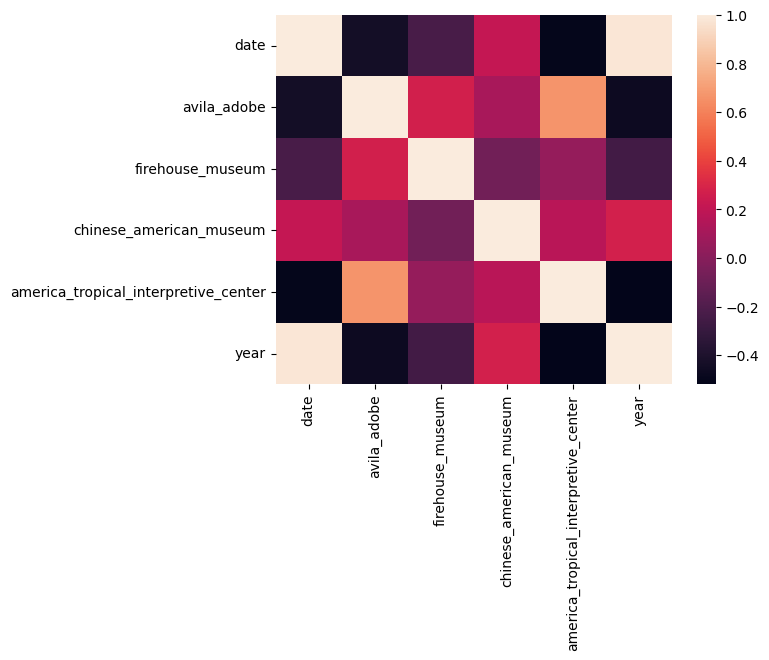

In [29]:
#Побудувати теплокарту кореляції для попереднього завдання
sns.heatmap(data.corr());

<Axes: xlabel='month', ylabel='vals'>

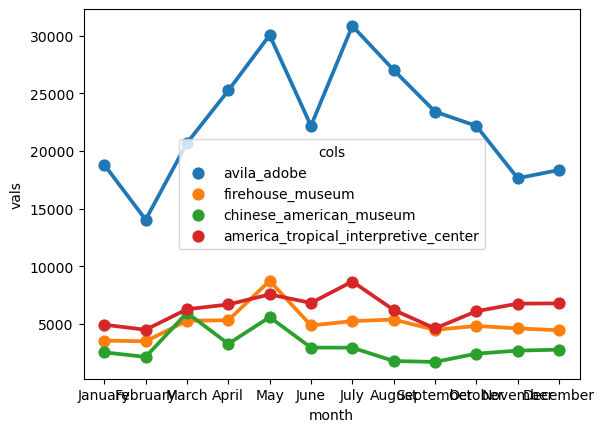

In [32]:
#Побудувати графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року
data5 = data
data5['date'] = pd.to_datetime(data5['date'], errors='coerce')
data5['year'] = data5['date'].dt.year
data5['month'] = data5['date'].dt.month_name()
data5 = data5.drop(data5[data5['year'] == 2014].index)
data5 = data5.drop(data5[data5['year'] == 2015].index)
data5 = data5.drop(data5[data5['year'] == 2016].index)
data5 = data5.drop(data5[data5['year'] == 2018].index)
data5 = data5.drop('date', axis=1)
data5 = data5.drop('year', axis=1)
data5.head(5)

data5m = data5.melt('month', var_name='cols', value_name='vals')

sns.pointplot(x="month", y="vals", hue='cols', data=data5m)

<Axes: xlabel='date', ylabel='america_tropical_interpretive_center'>

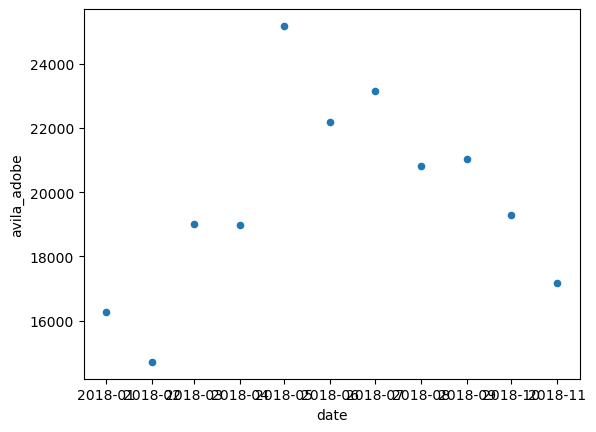

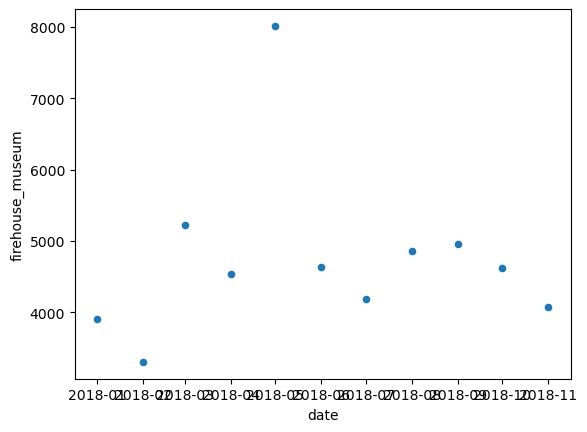

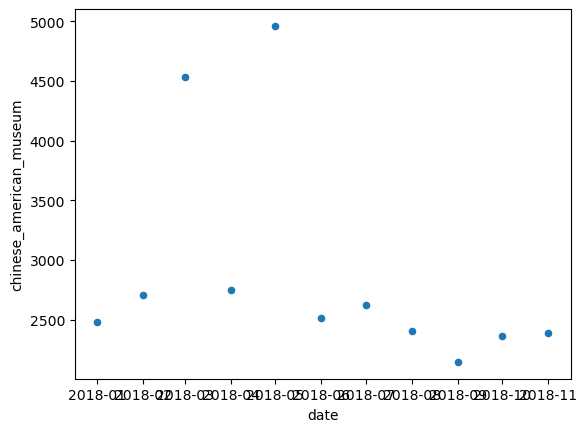

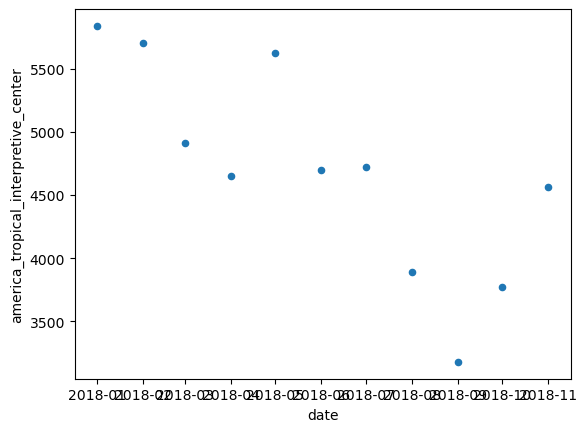

In [34]:
#Побудувати графіки розсіювання для кожного музею за 2018 рік
data6 = data
data6['date'] = pd.to_datetime(data6['date'], errors='coerce')
data6['year'] = data6['date'].dt.year
data6 = data6.drop(data6[data6['year'] == 2014].index)
data6 = data6.drop(data6[data6['year'] == 2015].index)
data6 = data6.drop(data6[data6['year'] == 2016].index)
data6 = data6.drop(data6[data6['year'] == 2017].index)
data6 = data6.drop('year', axis=1)
data6.head(5)

data6.plot.scatter(x='date', y='avila_adobe')
data6.plot.scatter(x='date', y='firehouse_museum')
data6.plot.scatter(x='date', y='chinese_american_museum')
data6.plot.scatter(x='date', y='america_tropical_interpretive_center')

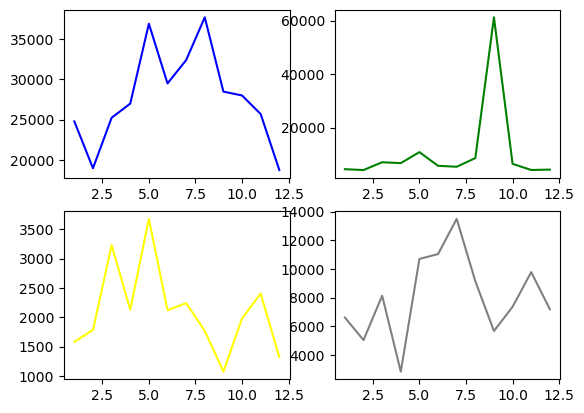

In [57]:
#Гістограма відвідуваності за місяцями кожного музею. 
#Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки. 
#Графіки розташовані два зверху, два знизу, колір першого графіка - синій, другого зелений, третього жовтий, четвертого сірий.

data7 = data

data7['date'] = pd.to_datetime(data7['date'], errors='coerce')
data7['year'] = data7['date'].dt.year
data7['month'] = data7['date'].dt.month
#----------------------------------------------------------------------------------------------------------
data2014 = data7
data2014 = data2014.drop(data2014[data2014['year'] == 2015].index)
data2014 = data2014.drop(data2014[data2014['year'] == 2016].index)
data2014 = data2014.drop(data2014[data2014['year'] == 2017].index)
data2014 = data2014.drop(data2014[data2014['year'] == 2018].index)
data2014 = data2014.drop('year', axis=1)

y_14 = data2014['month'].to_numpy()
x_14_1 = data2014['avila_adobe'].to_numpy()
x_14_2 = data2014['firehouse_museum'].to_numpy()
x_14_3 = data2014['chinese_american_museum'].to_numpy()
x_14_4 = data2014['america_tropical_interpretive_center'].to_numpy()
#----------------------------------------------------------------------------------------------------------
data2015 = data7
data2015 = data2015.drop(data2015[data2015['year'] == 2014].index)
data2015 = data2015.drop(data2015[data2015['year'] == 2016].index)
data2015 = data2015.drop(data2015[data2015['year'] == 2017].index)
data2015 = data2015.drop(data2015[data2015['year'] == 2018].index)
data2015 = data2015.drop('year', axis=1)

y_15 = data2015['month'].to_numpy()
x_15_1 = data2015['avila_adobe'].to_numpy()
x_15_2 = data2015['firehouse_museum'].to_numpy()
x_15_3 = data2015['chinese_american_museum'].to_numpy()
x_15_4 = data2015['america_tropical_interpretive_center'].to_numpy()
#----------------------------------------------------------------------------------------------------------
data2016 = data7
data2016 = data2016.drop(data2016[data2016['year'] == 2014].index)
data2016 = data2016.drop(data2016[data2016['year'] == 2015].index)
data2016 = data2016.drop(data2016[data2016['year'] == 2017].index)
data2016 = data2016.drop(data2016[data2016['year'] == 2018].index)
data2016 = data2016.drop('year', axis=1)

y_16 = data2016['month'].to_numpy()
x_16_1 = data2016['avila_adobe'].to_numpy()
x_16_2 = data2016['firehouse_museum'].to_numpy()
x_16_3 = data2016['chinese_american_museum'].to_numpy()
x_16_4 = data2016['america_tropical_interpretive_center'].to_numpy()
#----------------------------------------------------------------------------------------------------------
data2017 = data7
data2017 = data2017.drop(data2017[data2017['year'] == 2014].index)
data2017 = data2017.drop(data2017[data2017['year'] == 2015].index)
data2017 = data2017.drop(data2017[data2017['year'] == 2016].index)
data2017 = data2017.drop(data2017[data2017['year'] == 2018].index)
data2017 = data2017.drop('year', axis=1)

y_17 = data2017['month'].to_numpy()
x_17_1 = data2017['avila_adobe'].to_numpy()
x_17_2 = data2017['firehouse_museum'].to_numpy()
x_17_3 = data2017['chinese_american_museum'].to_numpy()
x_17_4 = data2017['america_tropical_interpretive_center'].to_numpy()
#----------------------------------------------------------------------------------------------------------
fig, axs = plt.subplots(nrows= 2 , ncols= 2)
axs[0, 0].plot(y_14, x_14_1, color='blue')
axs[0, 1].plot(y_14, x_14_2, color='green')
axs[1, 0].plot(y_14, x_14_3, color='yellow')
axs[1, 1].plot(y_14, x_14_4, color='grey')